In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode= 'rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
X_test.shape

(12630, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

36

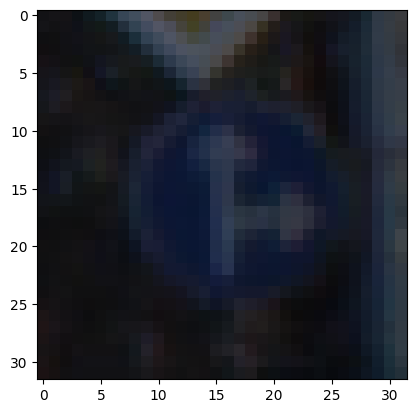

In [9]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

31

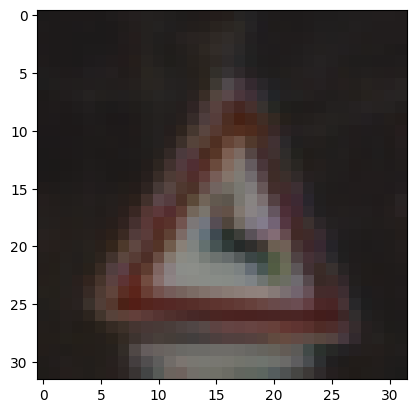

In [10]:
i = 100
plt.imshow(X_validation[i])
y_validation[i]

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_grey = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grey = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_grey = np.sum(X_validation/3, axis = 3, keepdims = True)

In [13]:
X_train_grey_norm = (X_train_grey - 128)/128
X_test_grey_norm = (X_test_grey - 128)/128
X_validation_grey_norm = (X_validation_grey -128)/128

In [14]:
X_train_grey_norm

array([[[[-0.71614583],
         [-0.7578125 ],
         [-0.76822917],
         ...,
         [ 0.77604167],
         [ 0.70833333],
         [ 0.7890625 ]],

        [[-0.72135417],
         [-0.77864583],
         [-0.78645833],
         ...,
         [ 0.84375   ],
         [ 0.83854167],
         [ 0.875     ]],

        [[-0.73958333],
         [-0.78385417],
         [-0.79166667],
         ...,
         [ 0.8125    ],
         [ 0.88802083],
         [ 0.92447917]],

        ...,

        [[-0.78385417],
         [-0.8046875 ],
         [-0.81510417],
         ...,
         [-0.20052083],
         [-0.23177083],
         [-0.1875    ]],

        [[-0.76822917],
         [-0.78385417],
         [-0.796875  ],
         ...,
         [-0.26041667],
         [-0.25260417],
         [-0.15104167]],

        [[-0.74479167],
         [-0.7578125 ],
         [-0.76822917],
         ...,
         [-0.20572917],
         [-0.19010417],
         [-0.12239583]]],


       [[[-0.70052083],


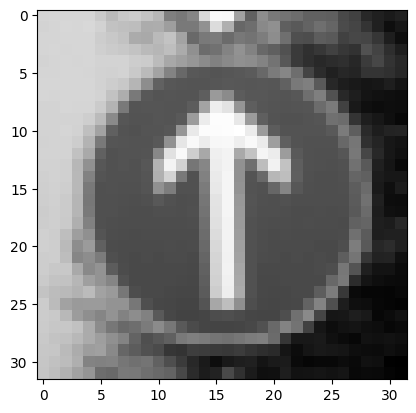

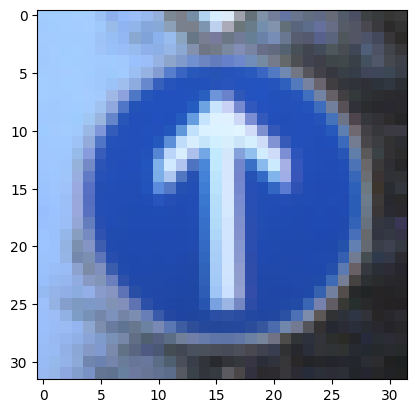

In [15]:
i = 610
plt.imshow(X_train_grey[i].squeeze(), cmap='grey')
plt.figure()
plt.imshow(X_train[i])

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers.legacy import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [17]:
image_shape = X_train_grey[i].shape

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation='relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax'))



In [19]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [20]:
history = cnn_model.fit(X_train_grey_norm,
                        y_train,
                        batch_size= 500,
                        epochs= 50,
                        verbose=1,
                        validation_data= (X_validation_grey_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 5s 63ms/step - loss: 3.1115 - accuracy: 0.1937 - val_loss: 2.5610 - val_accuracy: 0.3336
Epoch 2/50
70/70 [==============================] - 5s 78ms/step - loss: 1.5167 - accuracy: 0.5804 - val_loss: 1.2767 - val_accuracy: 0.6213
Epoch 3/50
70/70 [==============================] - 4s 63ms/step - loss: 0.8219 - accuracy: 0.7705 - val_loss: 0.9091 - val_accuracy: 0.7215
Epoch 4/50
70/70 [==============================] - 4s 64ms/step - loss: 0.5798 - accuracy: 0.8420 - val_loss: 0.7772 - val_accuracy: 0.7646
Epoch 5/50
70/70 [==============================] - 4s 63ms/step - loss: 0.4576 - accuracy: 0.8792 - val_loss: 0.7008 - val_accuracy: 0.7937
Epoch 6/50
70/70 [==============================] - 4s 63ms/step - loss: 0.3781 - accuracy: 0.9019 - val_loss: 0.6482 - val_accuracy: 0.8113
Epoch 7/50
70/70 [==============================] - 4s 63ms/step - loss: 0.3281 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.8259
Epoch 8/50
70

In [21]:
score = cnn_model.evaluate(X_test_grey_norm, y_test)
print('Test Accuracy:{}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.2428 - accuracy: 0.8721
Test Accuracy:0.8721298575401306


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



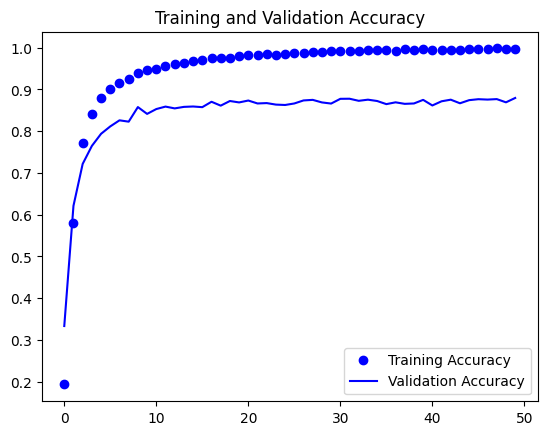

In [30]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label ='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label ='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

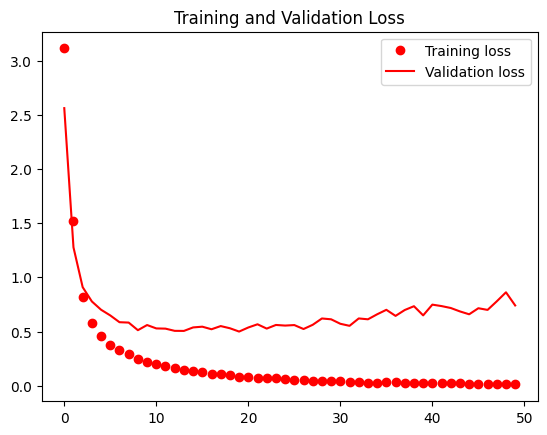

In [31]:
plt.plot(epochs, loss, 'ro', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

In [39]:
class_probabilities = cnn_model.predict(X_test_grey_norm)
y_true = y_test

predicted_classes = np.argmax(class_probabilities, axis=1)

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 32,  7, 10])

<Axes: >

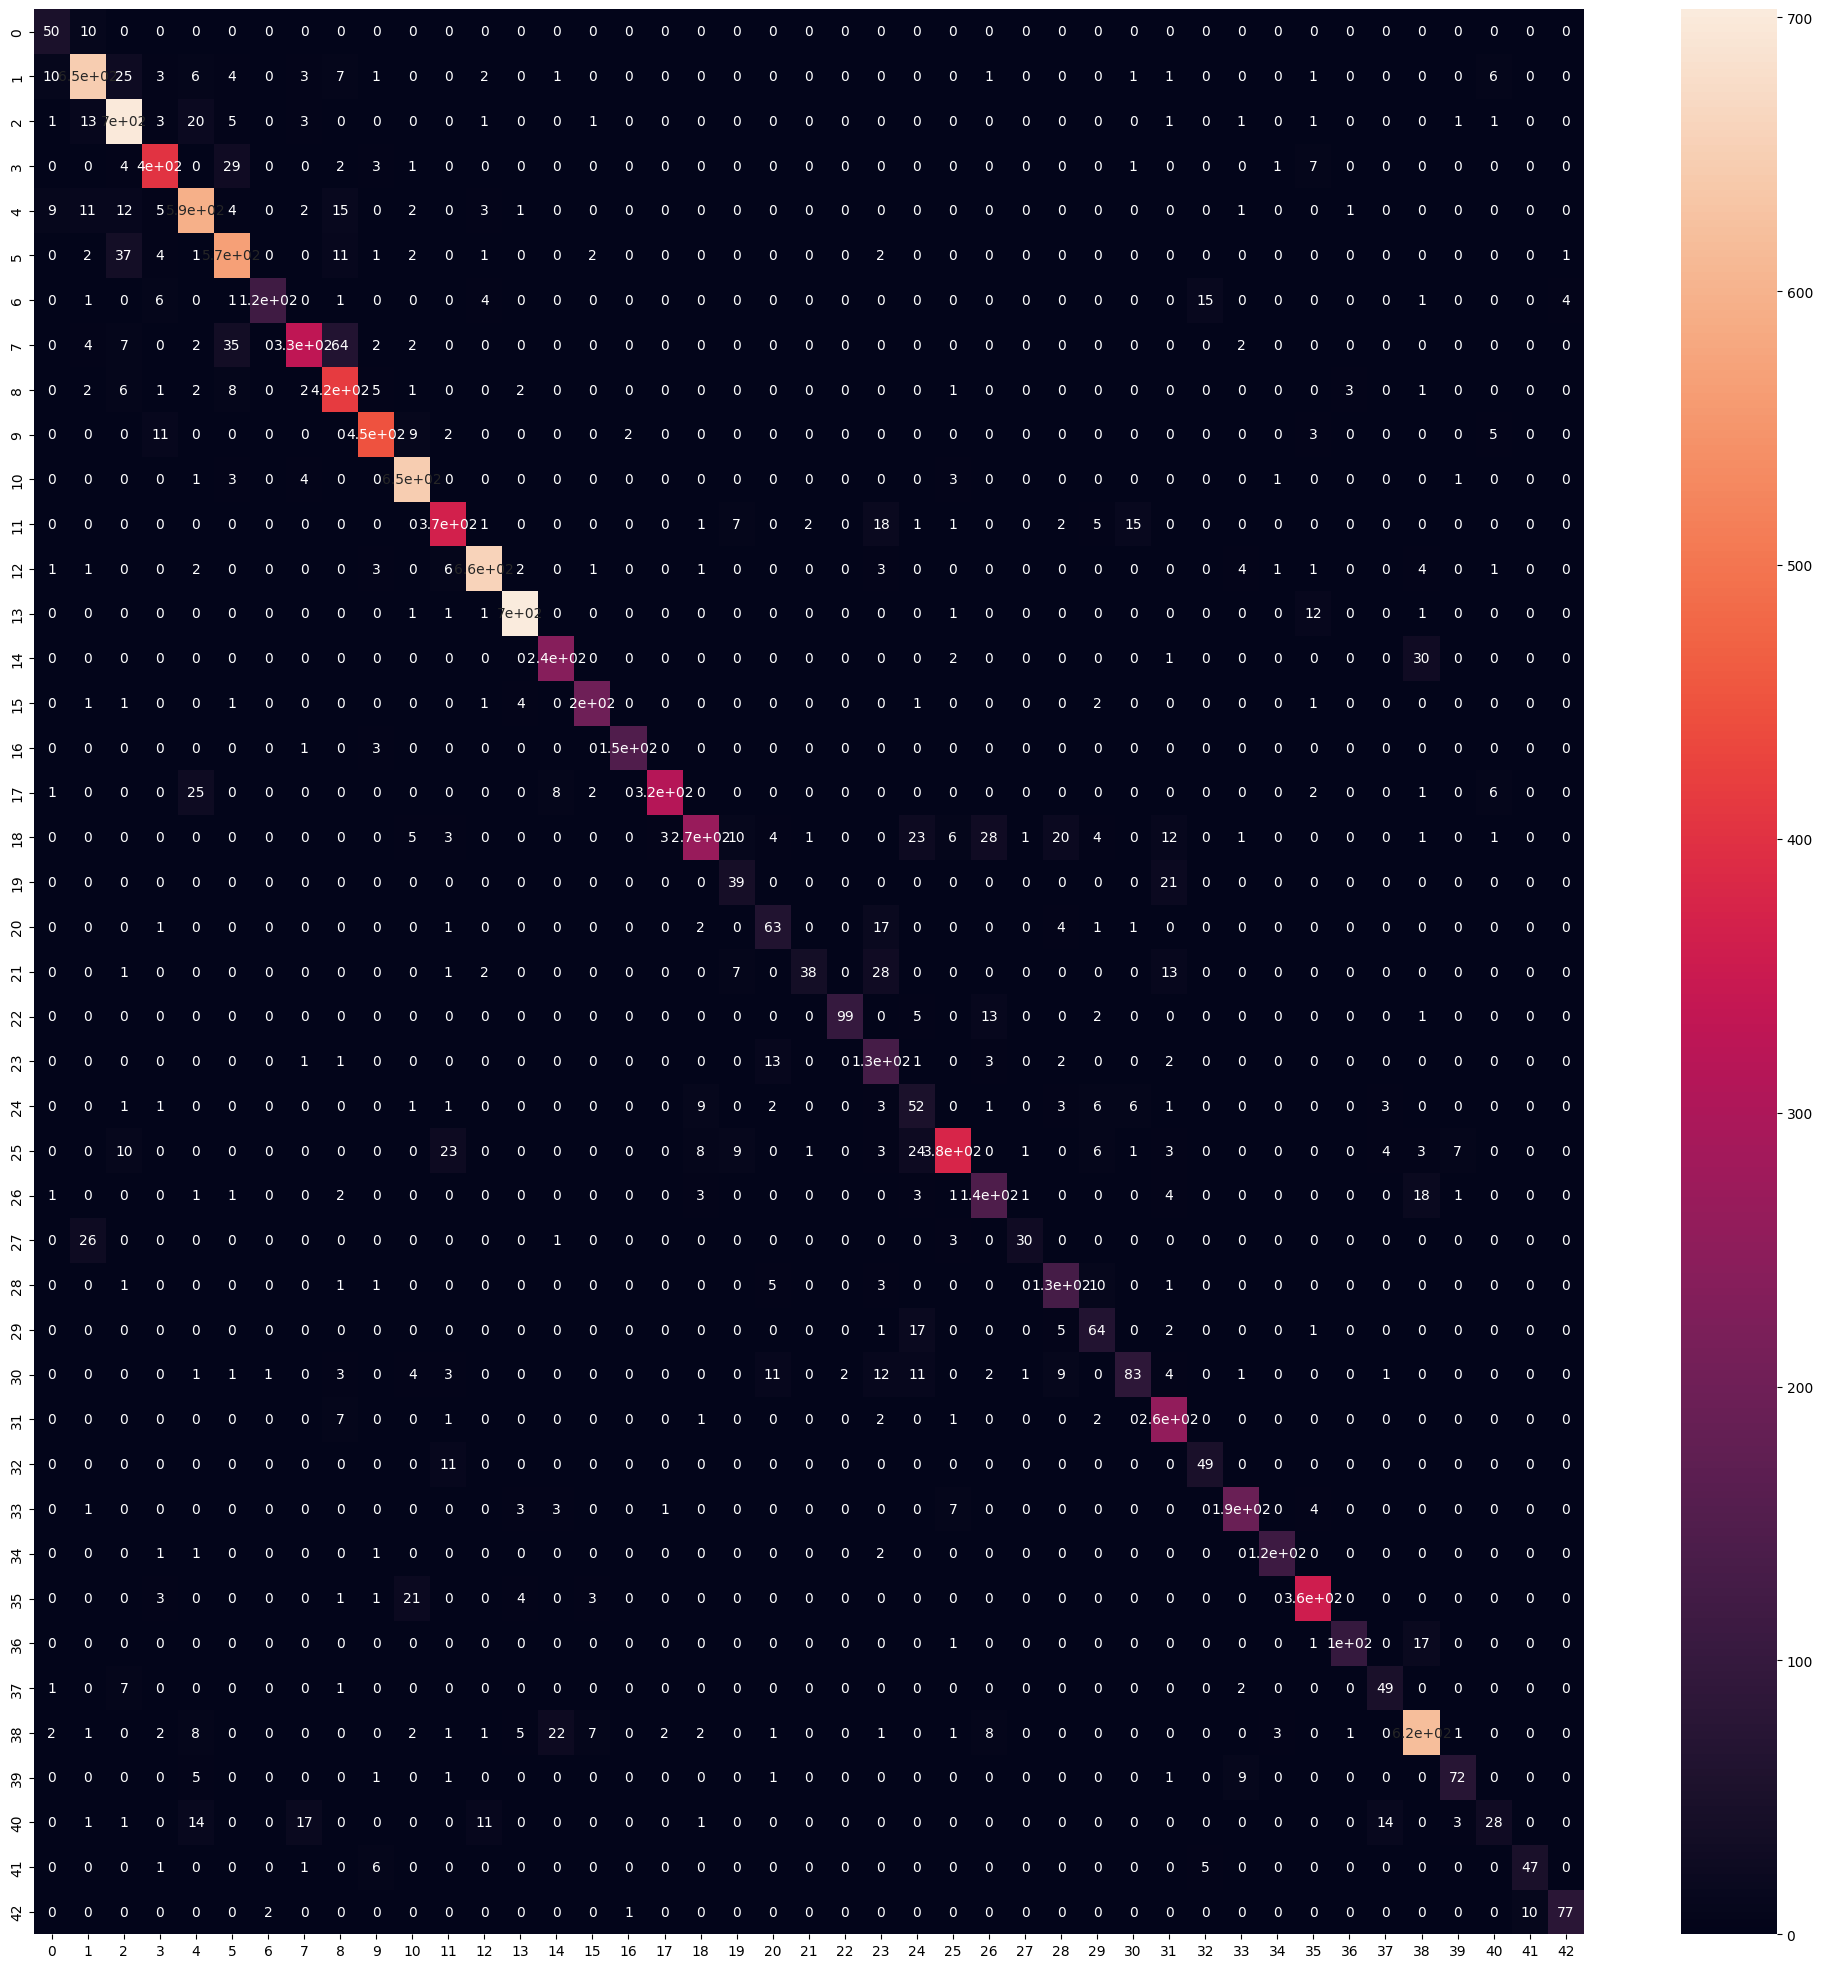

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

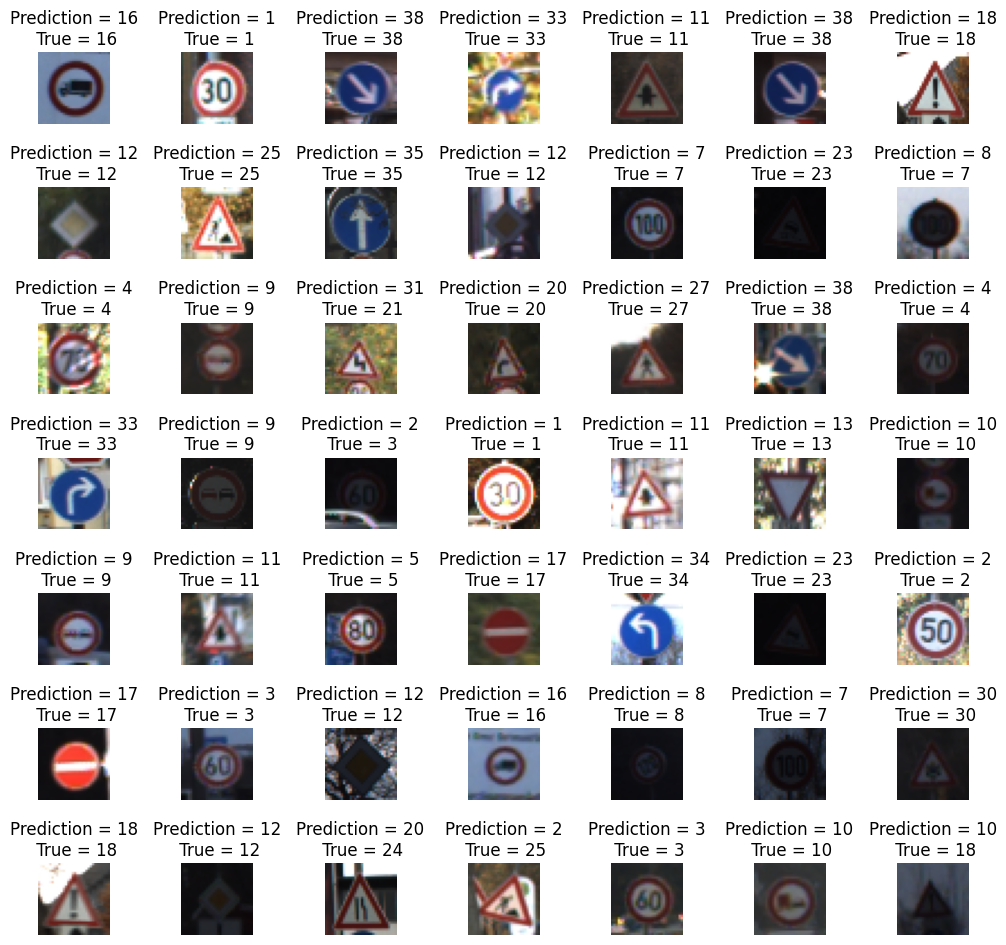

In [49]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)